In [21]:
### Initializing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Importing datasets

cardekho= pd.read_csv('car data.csv')
cardekho.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#Info about dataset

In [3]:
## shape of dataset

cardekho.shape  ## 301 rows and 9 columns/features/independent variables

(301, 9)

In [4]:
## values of categorical features

print(cardekho['Owner'].unique())
print(cardekho['Fuel_Type'].unique())
print(cardekho['Seller_Type'].unique())
print(cardekho['Transmission'].unique())


[0 1 3]
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [5]:
#missing values

cardekho.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
## describe about dataset

cardekho.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
## creating an final dataset excluding car name as it may not have any affect on model

cardekho_final=cardekho[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
cardekho_final

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
## creating derived varaibles

## creating an depreciation columns

### as year column car was 1st purchased so subtracting from todays year we can know how old is this car and how it affects selling price and 
## present price

cardekho_final['current_year']=2020
cardekho_final['number_years']=cardekho_final['current_year']-cardekho_final['Year']
cardekho_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,number_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [9]:
## dropping current year and year column

cardekho_final.drop(['Year','current_year'],axis=1,inplace=True)
cardekho_final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [10]:
## creating dummy varibales for categoriacl variables

cardekho_final= pd.get_dummies(cardekho_final,drop_first=True)
cardekho_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [11]:
## correlation matrix

cardekho_final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
number_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


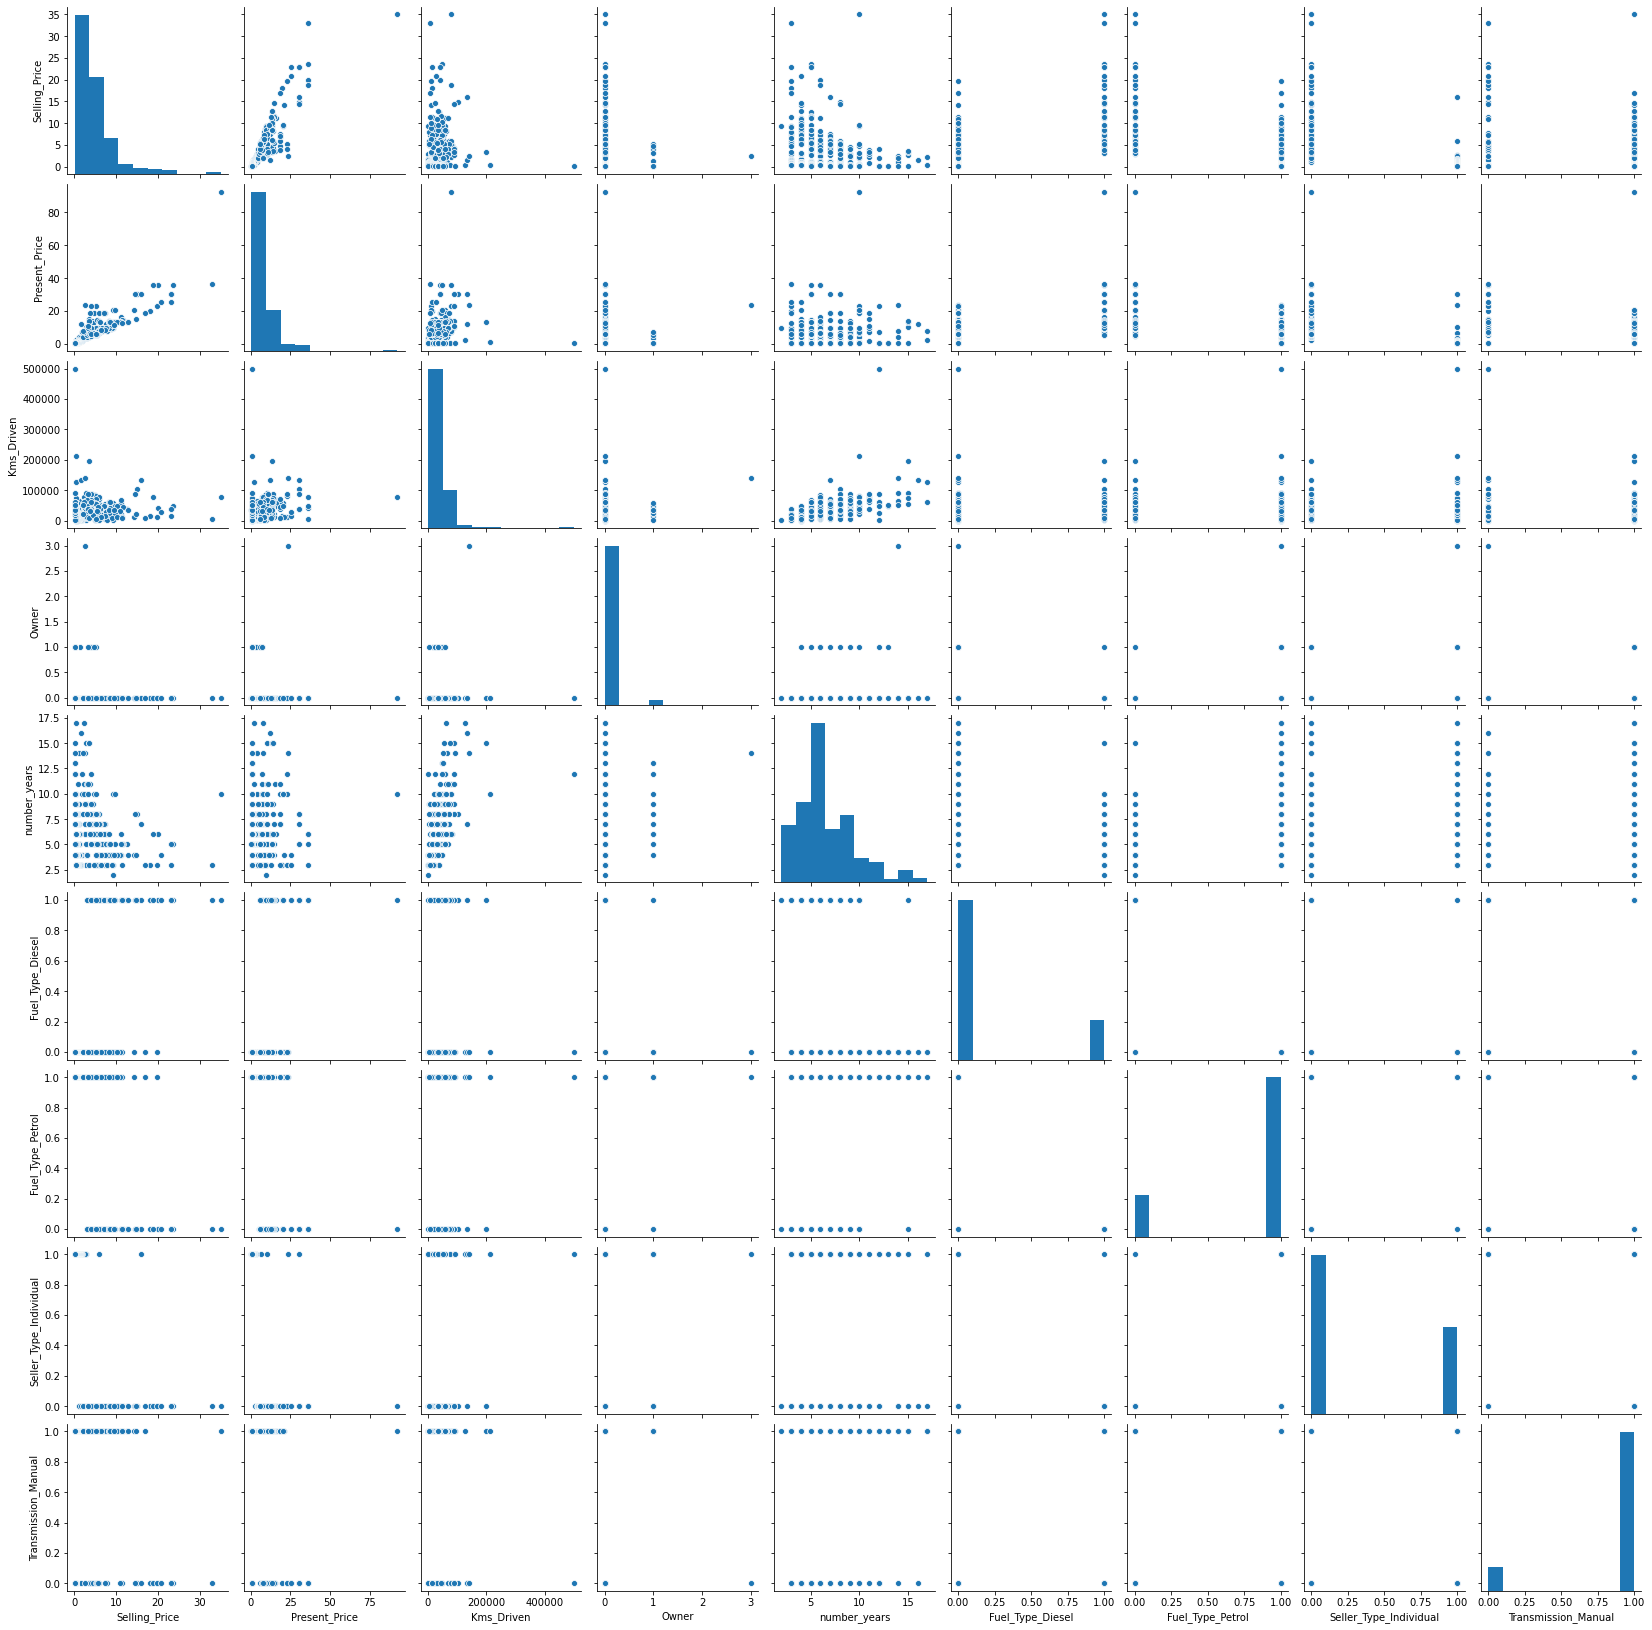

In [13]:
## creating correlation pairplot using seaborn

sns.pairplot(cardekho_final)

In [22]:
%matplotlib inline

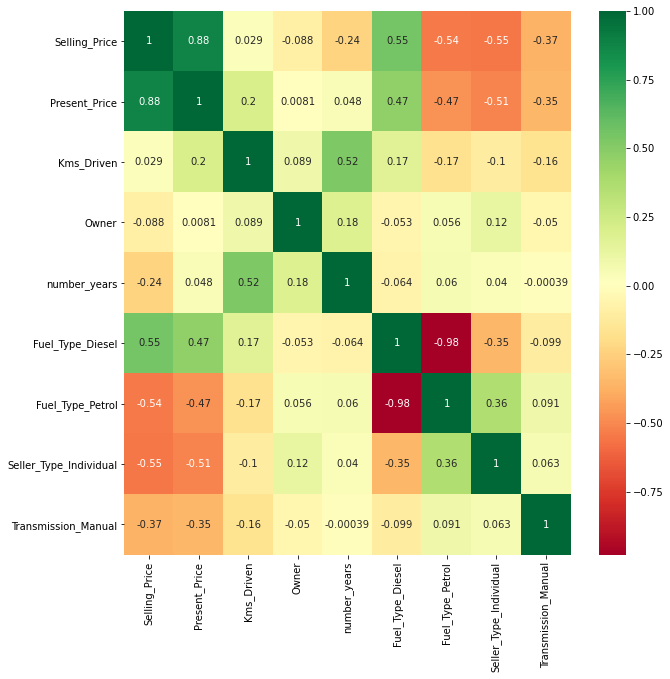

In [23]:
cardekho_final_corr= cardekho_final.corr()
top_corr_features= cardekho_final_corr.index
plt.figure(figsize=(10,10))
cardekho_final_heatmap= sns.heatmap(cardekho_final[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# creating dependent & independent varaibles

In [24]:
x_features=cardekho_final.iloc[:,1:]  ## selling price is our dependent variables so its in 1st column we are not taking him
y_features=cardekho_final.iloc[:,0] #taking independeent variables as y_fetures

# Feature Importance

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(x_features,y_features)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[0.41742396 0.04358705 0.00115601 0.07642549 0.2079143  0.01834288
 0.11500615 0.12014416]


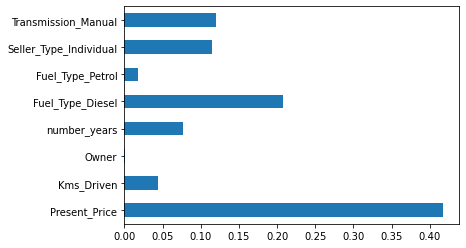

In [34]:
## plot graph for showing feature importance using visualization

feature_imp= pd.Series(model.feature_importances_,index=x_features.columns)
feature_imp.plot(kind='barh')
plt.show()

# train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2)

124     0.95
118     1.10
80     14.73
93     23.00
175     0.38
Name: Selling_Price, dtype: float64

# model selection and training

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_random= RandomForestRegressor()

In [58]:
#hyperparameters

# number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]


#Number of features to consider at every split
max_features=['auto','sqrt']

#Maximum number of levels in tree

max_depth= [int(x)  for x in np.linspace(2,30,6)]

# Min number of sampless req to split a node

min_samples_split=[2,5,10,15,100]

# Minimum number of samples req at each leaf node

min_samples_leaf=[1,2,5,10]

In [59]:
## finding the best parameters for the model

from sklearn.model_selection import RandomizedSearchCV

random_grid= {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 7, 13, 18, 24, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [60]:
# initialize random forest regressor to tune best hyperparameter

rf= RandomForestRegressor()

In [61]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=10,cv=5,
                             verbose=2,random_state=42,n_jobs=1)

In [62]:
rf_random.fit(X_train,y_train)
print(rf_random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=7, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=13 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=13, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, min_sampl

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [2, 7, 13, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)


In [63]:
predictions=rf_random.predict(X_test)
predictions

array([ 1.03193  ,  0.98465  , 11.23761  , 21.9103   ,  0.60422  ,
        2.86062  ,  2.79772  , 19.98363  ,  0.65182  ,  8.0322225,
        6.9788   ,  8.123    ,  2.3027   ,  3.80376  ,  0.69955  ,
        3.7409   ,  1.10975  ,  3.43596  ,  4.1421   ,  0.63677  ,
        1.42728  ,  1.39502  ,  8.8528   ,  6.22663  ,  0.94115  ,
        5.0276   ,  5.8494   ,  0.92343  ,  8.25584  ,  0.50757  ,
        5.74168  ,  0.57772  ,  3.89046  ,  0.58929  ,  3.58507  ,
        0.25576  ,  0.52248  ,  0.43232  , 10.06223  ,  5.37899  ,
        5.83145  ,  0.87732  ,  3.58809  ,  0.64348  ,  4.03332  ,
        2.71067  ,  0.96184  ,  3.54006  ,  3.14673  ,  8.17729  ,
       11.73344  ,  4.78997  ,  0.6263   ,  0.63313  ,  8.20374  ,
        8.8442   ,  5.38116  ,  4.88001  ,  0.54571  ,  5.66793  ,
        3.98866  ])

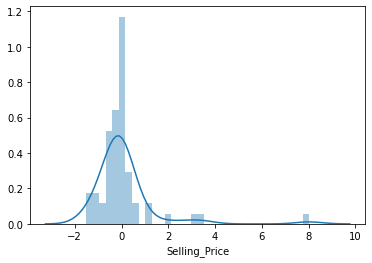

In [64]:
sns.distplot(y_test-predictions)

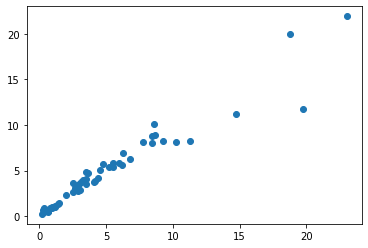

In [65]:
plt.scatter(y_test,predictions)

In [68]:
## saving the model

import pickle
# file location where you want to save

file= open('random_forest_regression_model.pkl','wb')

## dump information to file

pickle.dump(rf_random,file)